In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

In [3]:
data = pd.read_csv('chicago_crime_2014 (2).csv')


In [4]:
data.head()

ID Case Number                    Date                   Block  IUCR  \
0  9446824    HX100141  01/01/2014 02:00:00 AM     0000X W ILLINOIS ST  0460   
1  9446748    HX100020  01/01/2014 12:00:00 AM     006XX N DEARBORN ST  0890   
2  9446758    HX100030  01/01/2014 12:30:00 AM        052XX W RACE AVE  1310   
3  9446760    HX100027  01/01/2014 12:30:00 AM  053XX W WELLINGTON AVE  0460   
4  9446764    HX100054  01/01/2014 12:10:00 AM    014XX W LEXINGTON ST  0460   

      Primary Type    Description Location Description Arrest Domestic  \
0          BATTERY         SIMPLE               STREET  False    False   
1            THEFT  FROM BUILDING        BAR OR TAVERN  False    False   
2  CRIMINAL DAMAGE    TO PROPERTY            APARTMENT  False    False   
3          BATTERY         SIMPLE            APARTMENT   True    False   
4          BATTERY         SIMPLE               STREET  False    False   

     Beat  District  Ward  Community Area FBI Code   Latitude  Longitude  
0  1831.0      18.0  42.0             8.0      08B  41.890828 -87.630235  
1  1832.0      18.0  42.0             8.0       06  41.893542 -87.629702  
2  1523.0      15.0  28.0            25.0       14  41.890046 -87.756333  
3  2514.0      25.0  31.0            19.0      08B  41.935011 -87.759739  
4  1231.0      12.0  25.0            28.0      08B  41.872509 -87.663069

In [5]:
data.describe()

ID         Beat     District         Ward  Community Area  \
count  6.461000e+03  6460.000000  6460.000000  6460.000000     6460.000000   
mean   9.454123e+06  1141.758514    11.189628    23.048142       37.116718   
std    4.171069e+03   685.399332     6.846702    13.572111       21.204422   
min    9.446748e+06   111.000000     1.000000     1.000000        1.000000   
25%    9.450495e+06   614.000000     6.000000    11.000000       23.000000   
50%    9.454480e+06  1031.000000    10.000000    24.000000       32.000000   
75%    9.457986e+06  1634.000000    16.000000    34.000000       56.000000   
max    9.460683e+06  2535.000000    25.000000    50.000000       77.000000   

          Latitude    Longitude  
count  6459.000000  6459.000000  
mean     41.840740   -87.672825  
std       0.106516     0.076430  
min      36.619446   -91.686566  
25%      41.768624   -87.716105  
50%      41.859989   -87.667196  
75%      41.902783   -87.628278  
max      42.022534   -87.530450

#Bargraph

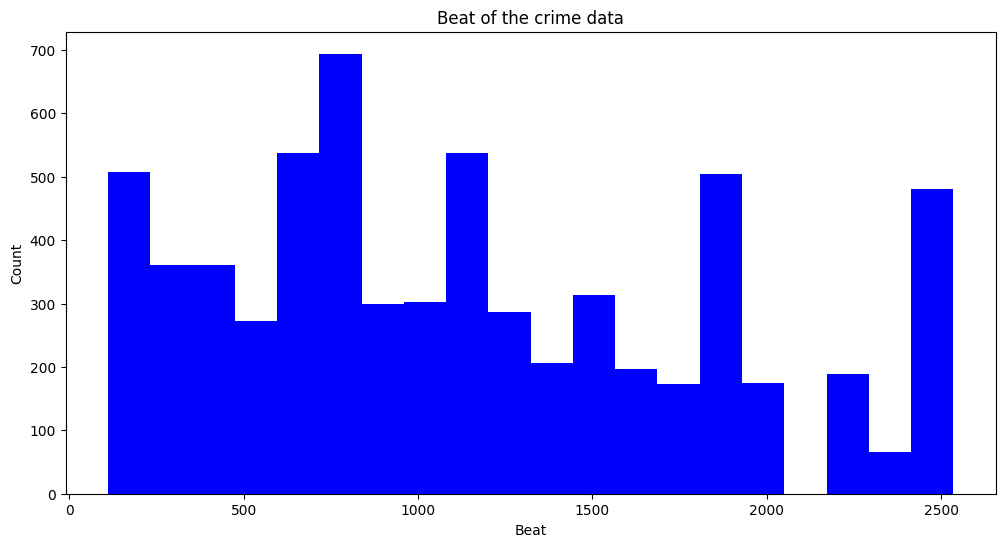

In [6]:
plt.figure(figsize = (12,6))
x = data ["Beat"]
plt.hist(x, bins = 20, color = "blue")
plt.title("Beat of the crime data")
plt.xlabel("Beat")
plt.ylabel("Count");

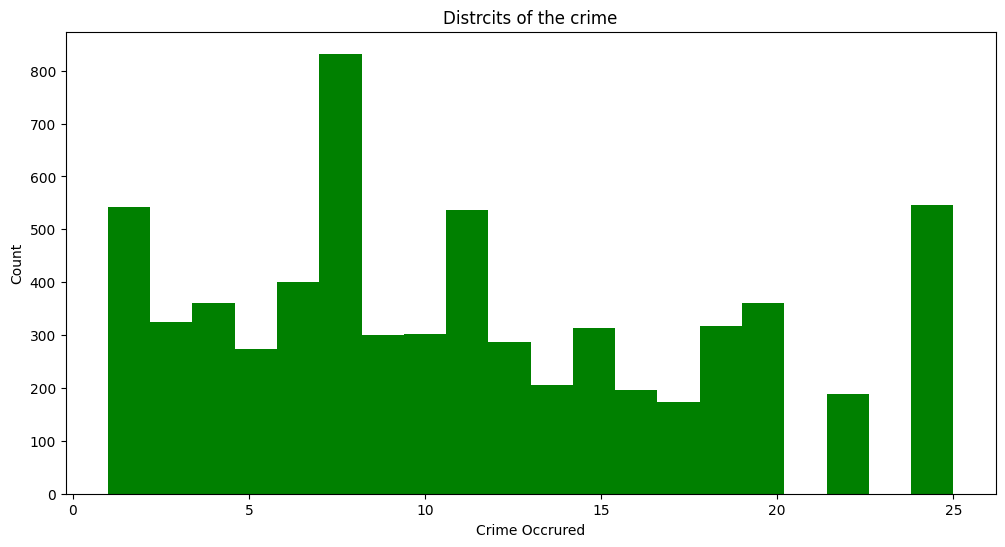

In [7]:
plt.figure(figsize = (12,6))
x = data ["District"]
plt.hist(x, bins = 20, color = "green")
plt.title("Distrcits of the crime")
plt.xlabel("Crime Occrured")
plt.ylabel("Count");

#Scatter Plot

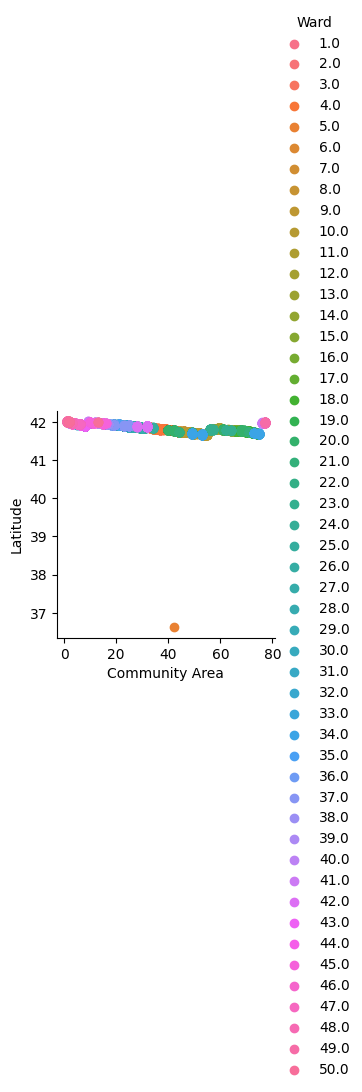

In [8]:
sns.FacetGrid(data ,hue="Ward") \
.map(plt.scatter,"Community Area","Latitude") \
.add_legend()
plt.show()

#Box Plot

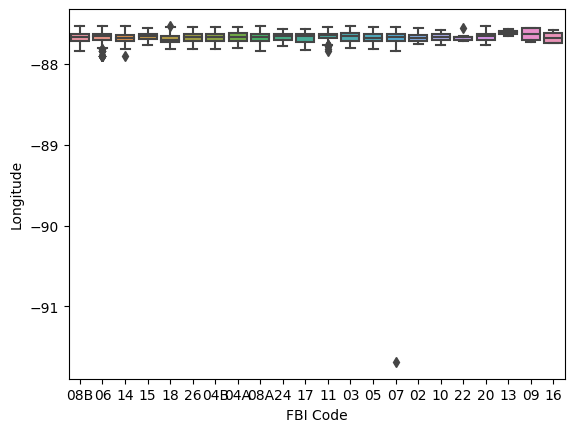

In [9]:
sns.boxplot(x="FBI Code", y="Longitude", data=data);

In [14]:
X = data.drop(['Case Number', "Date","Block","IUCR","Primary Type", "Description"], axis=1)
y = data['Primary Type']


In [15]:
data = data.apply(lambda x: pd.factorize(x)[0])


#Random Forest Model

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [18]:
y_pred = rf_classifier.predict(X_test)



In [19]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [20]:
print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)



Accuracy: 0.9303944315545244
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       264
           1       1.00      1.00      1.00       264
           2       0.98      1.00      0.99       131
           3       0.93      0.81      0.87        16
           4       1.00      1.00      1.00       138
           5       0.65      0.90      0.75        63
           6       0.79      0.92      0.85        78
           7       0.67      0.22      0.33         9
           8       0.44      0.57      0.50         7
           9       0.87      0.57      0.69        47
          10       0.67      0.17      0.27        12
          11       0.00      0.00      0.00         1
          12       0.92      0.81      0.86        58
          13       0.91      0.97      0.94        64
          14       0.92      0.95      0.94        77
          15       0.93      0.94      0.93        53
          16       0.50     

#XGBoost Model

In [21]:
X = data.drop(['Beat'], axis=1)
y = data['Ward']




In [22]:
model= xgb.XGBClassifier()

In [24]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [25]:
y_pred = model.predict(X_test)

In [61]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.24980665119876258


#KNN Model

In [112]:
categorical_columns = ['Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic', 'FBI Code']

# Apply label encoding to categorical columns
label_encoders = {}
for column in categorical_columns:
    label_encoder = LabelEncoder()
    data[column] = label_encoder.fit_transform(data[column])
    label_encoders[column] = label_encoder


In [113]:
X = data.drop(['Case Number', "Date","Block","IUCR","Primary Type", "Description"], axis=1)
y = data['District']



In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
model = KNeighborsClassifier(n_neighbors=1)

In [116]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [117]:
y_pred = model.predict(X_test)

In [118]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 1.0
